<a href="https://colab.research.google.com/github/lc0/deeplearning-playground/blob/master/The_simplest_fashion_mnist_+_Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

# tf.enable_eager_execution()

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images_norm = train_images/256
test_images_norm = test_images/256

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
model.fit(train_images_norm, train_labels, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 7s 119us/step - loss: 0.5024 - acc: 0.8229
Epoch 2/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.3790 - acc: 0.8634
Epoch 3/5
60000/60000 [==============================] - 6s 105us/step - loss: 0.3390 - acc: 0.8759
Epoch 4/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.3140 - acc: 0.8842
Epoch 5/5
60000/60000 [==============================] - 6s 104us/step - loss: 0.2985 - acc: 0.8905


In [6]:
loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

10000/10000 [==============================] - 1s 75us/step
Test loss: 0.341156424677372
Test accuracy: 0.8785


Image ID 7678 - 6


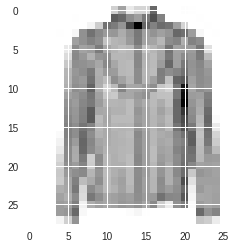

In [7]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

image_id = np.random.randint(len(test_images))
print("Image ID {} - {}".format(image_id, test_labels[image_id]))
plt.imshow(test_images[image_id], cmap='Greys')

In [8]:
image_data = (test_images[image_id]/256)
model.predict(image_data.reshape(1, 28, 28))

array([[1.9141521e-04, 2.3384351e-05, 5.1224966e-02, 4.5451528e-04,
        5.0013477e-01, 8.7937156e-07, 4.4793499e-01, 8.1495465e-08,
        3.4769622e-05, 1.7106058e-07]], dtype=float32)

In [9]:
np.argmax(model.predict(image_data.reshape(1, 28, 28)))

4

In [10]:
model.save('fashion-mnist.hd5')

In [0]:
from google.colab import files

files.download('fashion-mnist.hd5')

In [12]:
!ls -laF

total 432
drwxr-xr-x 1 root root   4096 Nov 18 22:28 ./
drwxr-xr-x 1 root root   4096 Nov 18 22:26 ../
drwxr-xr-x 4 root root   4096 Nov 15 19:23 .config/
-rw-r--r-- 1 root root 422848 Nov 18 23:05 fashion-mnist.hd5
drwxr-xr-x 2 root root   4096 Nov 15 19:33 sample_data/


In [13]:
from tensorflow.keras.models import load_model

newmodel = load_model('fashion-mnist.hd5')

Image ID 4900 - target class 8
[[1.2879003e-07 1.2247987e-09 6.5735357e-08 2.9130150e-11 1.3501520e-07
  1.3028882e-10 2.3023703e-07 7.0167577e-10 9.9999940e-01 1.0344341e-08]]


Predicted - 8


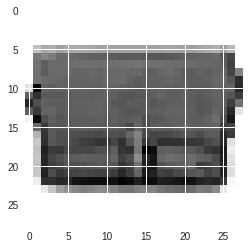

In [14]:
newmodel.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


image_id = np.random.randint(len(test_images))
print("Image ID {} - target class {}".format(image_id, test_labels[image_id]))
plt.imshow(test_images[image_id], cmap='Greys')

image_data = (test_images[image_id]/256)
print(model.predict(image_data.reshape(1, 28, 28)))

print("\n\nPredicted - {}".format(np.argmax(model.predict(image_data.reshape(1, 28, 28)))))

# Confusion matrix

In [0]:
?tf.confusion_matrix

In [16]:
np.argmax(model.predict(test_images_norm), axis=1)

array([9, 2, 1, ..., 8, 1, 5])

In [0]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix(test_labels, np.argmax(model.predict(test_images_norm), axis=1))

array([[816,   4,   9,  47,   7,   1, 103,   0,  13,   0],
       [  1, 967,   0,  27,   2,   0,   3,   0,   0,   0],
       [ 17,   2, 757,  24, 145,   0,  55,   0,   0,   0],
       [ 17,   5,   7, 933,  17,   0,  17,   0,   4,   0],
       [  1,   1,  73,  63, 828,   0,  34,   0,   0,   0],
       [  0,   0,   0,   1,   0, 967,   0,  17,   1,  14],
       [107,   0,  79,  52, 106,   0, 644,   0,  12,   0],
       [  0,   0,   0,   0,   0,  30,   0, 931,   0,  39],
       [  5,   0,   2,   6,   4,   2,   0,   3, 978,   0],
       [  0,   0,   0,   0,   0,   7,   1,  28,   0, 964]])

In [0]:
cm = confusion_matrix(test_labels, np.argmax(model.predict(test_images_norm), axis=1))

In [0]:
import seaborn as sns; sns.set()

In [0]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

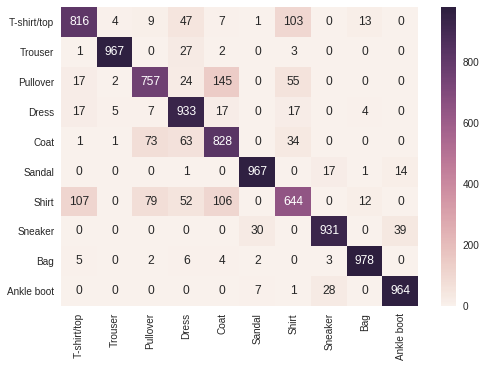

In [22]:
confusion_matrix = sns.heatmap(cm, annot=True, fmt="d", yticklabels=fashion_mnist_labels, xticklabels=fashion_mnist_labels)
confusion_matrix.set_xticklabels(confusion_matrix.get_xticklabels(), rotation = 90)

confusion_matrix